In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
data = pd.read_csv('/Users/srinivasanc/Downloads/datasets/Student Depression Dataset.csv')

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['Financial Stress'] = data['Financial Stress'].fillna(data['Financial Stress'].mean())

In [10]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
le = LabelEncoder()

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [13]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,3,11,2.0,0.0,5.90,5.0,0.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,44,11,3.0,0.0,7.03,5.0,0.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,49,11,3.0,0.0,5.59,2.0,0.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,16,11,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0


In [14]:
data.drop('id', axis=1, inplace=True)

In [15]:
data['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [16]:
X = data.drop('Depression', axis=1)
y = data['Depression']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=42)

In [21]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [24]:
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
models = {
    'Catboost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0),
    'Adaboost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    'Mlpclassifier': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=15),
    'Logistic_regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Lgbm': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
}

# Step 4: Train models and evaluate
from sklearn.metrics import accuracy_score

result = {}

for name, model in models.items():
    if name == 'Catboost':
        model.fit(X_train_scaled, y_train_resampled, eval_set=(X_test_scaled, y_test), verbose=100)
    else:
        model.fit(X_train_scaled, y_train_resampled)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    result[name] = {'Accuracy': accuracy}

# Show results
result

0:	learn: 0.6426935	test: 0.6465864	best: 0.6465864 (0)	total: 53.7ms	remaining: 5.32s
99:	learn: 0.3020847	test: 0.3591149	best: 0.3591149 (99)	total: 172ms	remaining: 0us

bestTest = 0.3591148916
bestIteration = 99



/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:17:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 11470, number of negative: 11470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 22940, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

{'Catboost': {'Accuracy': 0.8423127463863338},
 'Adaboost': {'Accuracy': 0.8374148847210608},
 'Mlpclassifier': {'Accuracy': 0.7881973479870983},
 'Logistic_regression': {'Accuracy': 0.8401624656552383},
 'Random Forest': {'Accuracy': 0.8316808027714729},
 'XGBoost': {'Accuracy': 0.8300083622028431},
 'SVM': {'Accuracy': 0.8364592043961295},
 'Lgbm': {'Accuracy': 0.8401624656552383}}

In [30]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Report:\n{classification_report(y_test, y_pred)}")

Catboost Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3505
           1       0.86      0.87      0.86      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.84      0.84      8371
weighted avg       0.84      0.84      0.84      8371

Adaboost Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3505
           1       0.86      0.86      0.86      4866

    accuracy                           0.84      8371
   macro avg       0.83      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371

Mlpclassifier Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3505
           1       0.82      0.82      0.82      4866

    accuracy                           0.79      8371
   macro avg       0.78      0.78      0.78      8371
weighted avg      

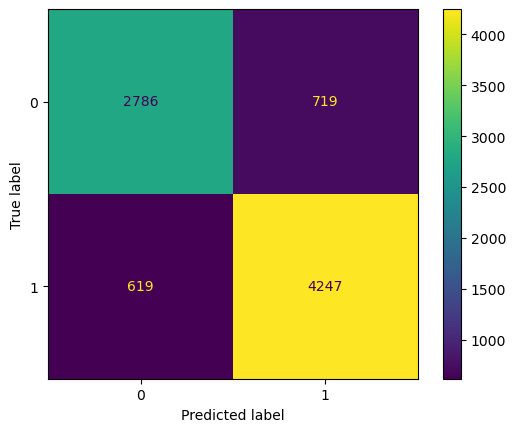

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)

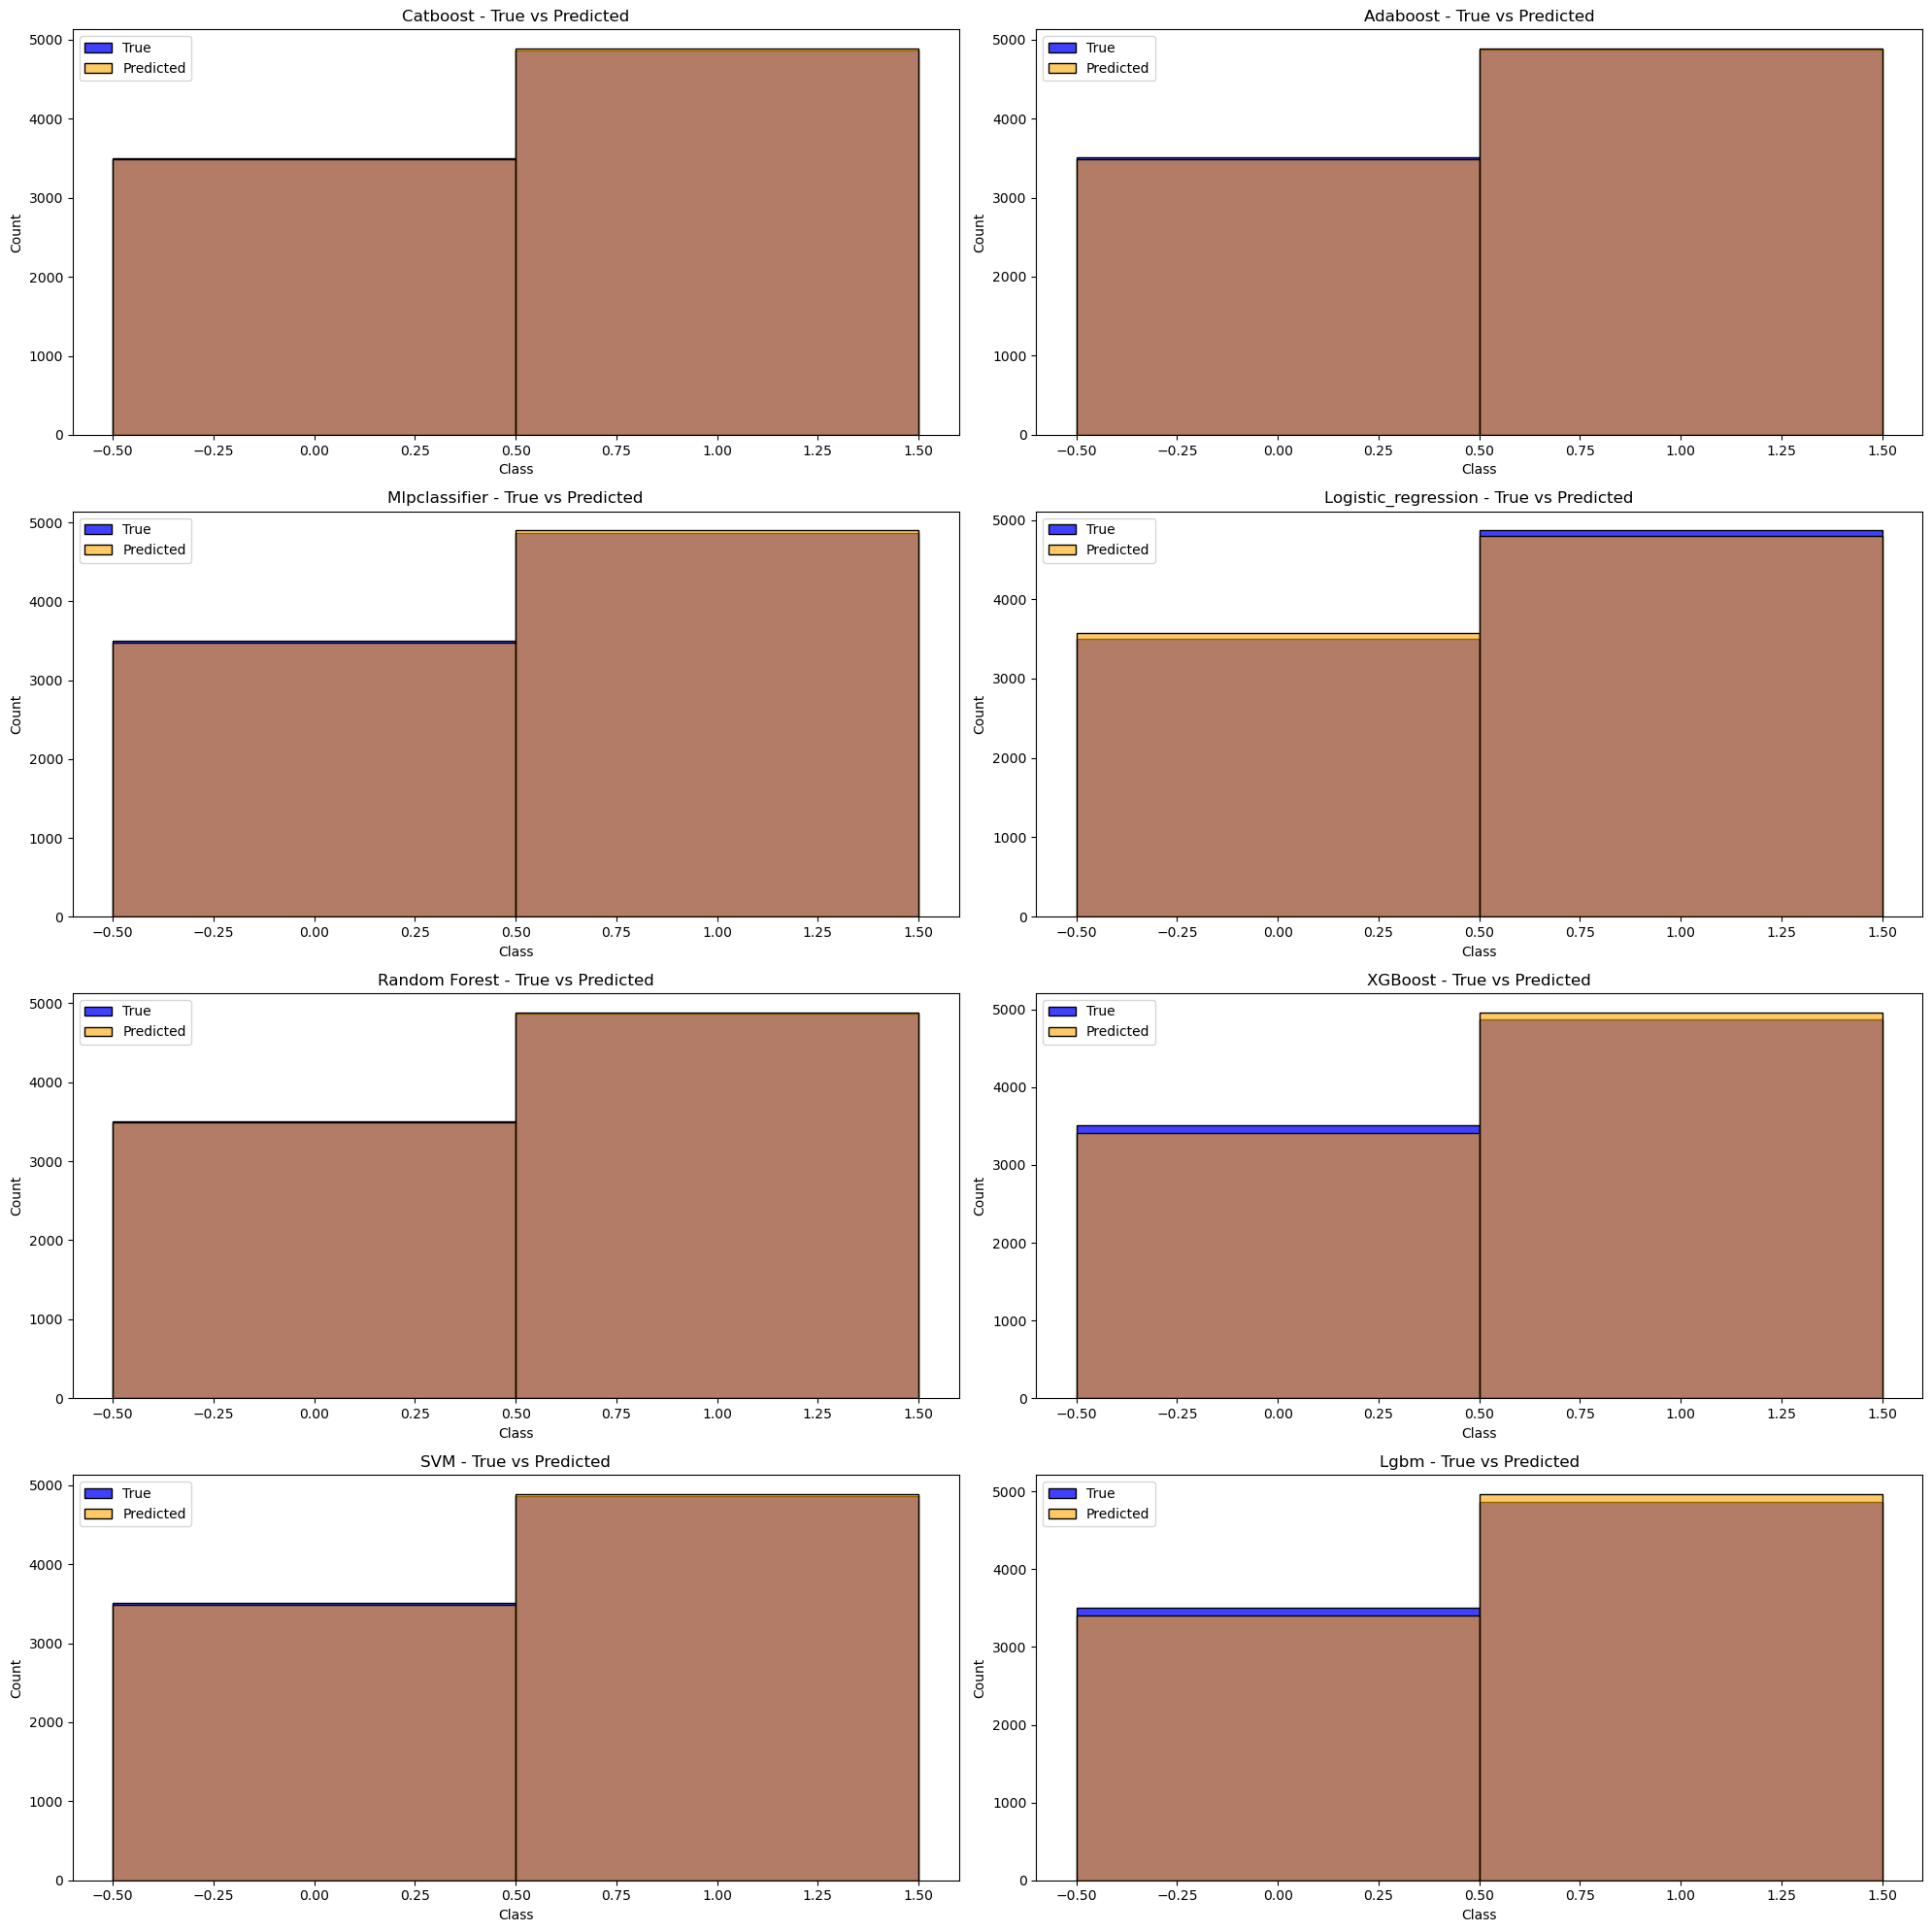

In [34]:
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(models.items(), 1):
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    plt.subplot(4, 2, i)
    
    sns.histplot(y_test, label='True', color='blue', kde=False, bins=2, discrete=True)
    sns.histplot(y_pred, label='Predicted', color='orange', kde=False, bins=2, discrete=True, alpha=0.6)
    
    plt.title(f'{name} - True vs Predicted')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()

In [36]:
corr = data.corr()

<Axes: >

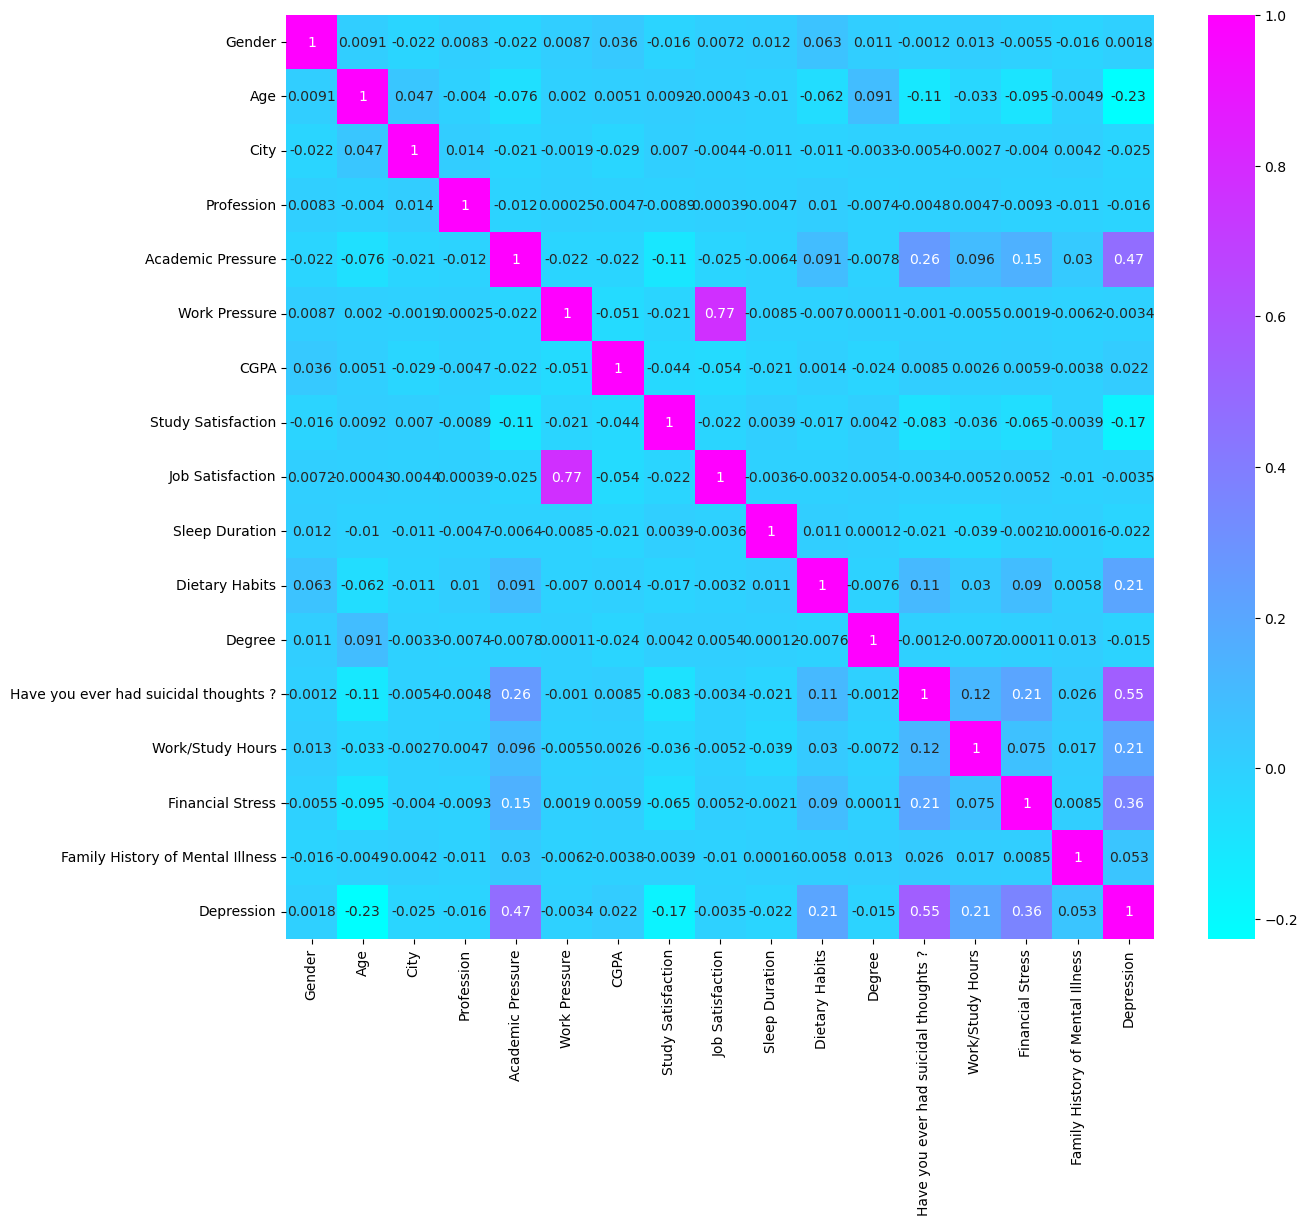

In [38]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, cmap='cool')

In [44]:
new_student = {
    'Gender': 'Female',
    'Age': 20,
    'City': 'Delhi',
    'Profession': 'Student',
    'Academic Pressure': 3.0,
    'Work Pressure': 1.0,
    'CGPA': 9.0,
    'Study Satisfaction': 5.0,
    'Job Satisfaction': 4.0,
    'Sleep Duration': '7-8 hours',
    'Dietary Habits': 'Very Healthy',
    'Degree': 'B.Tech',
    'Have you ever had suicidal thoughts ?': 'No',
    'Work/Study Hours': 5.0,
    'Financial Stress': 0.0,
    'Family History of Mental Illness': 'No'
}
new_df = pd.DataFrame([new_student])

# Label encode like you did before (same LabelEncoder)
for col in new_df.select_dtypes(include='object').columns:
    new_df[col] = le.fit_transform(new_df[col])

for col in new_df.columns:
    if new_df[col].dtype == ['int64','float64']:
        new_df[col] = scaler.fit_transform(data[col])


print("\n Depression Prediction for New Student:")
for name, model in models.items():
    prediction = model.predict(new_df)[0]
    result = "Depressed" if prediction == 1 else "Not Depressed"
    print(f"{name}: {result}")


 Depression Prediction for New Student:
Catboost: Depressed
Adaboost: Depressed
Mlpclassifier: Not Depressed
Logistic_regression: Not Depressed
Random Forest: Depressed
XGBoost: Depressed
SVM: Not Depressed
Lgbm: Not Depressed


/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [46]:
print("\nDepression Prediction Probabilities for New Student:")

for name, model in models.items():
    try:
        proba = model.predict_proba(new_df)[0][1]  # Probability of class '1' (Depressed)
        prediction = model.predict(new_df)[0]
        status = "Depressed" if prediction == 1 else "Not Depressed"
        print(f"{name}: {status} (Prob: {proba:.4f})")
    except Exception as e:
        print(f"{name}: Could not compute probabilities – {e}")


Depression Prediction Probabilities for New Student:
Catboost: Depressed (Prob: 0.8245)
Adaboost: Depressed (Prob: 0.5401)
Mlpclassifier: Not Depressed (Prob: 0.0000)
Logistic_regression: Not Depressed (Prob: 0.0023)
Random Forest: Depressed (Prob: 0.7200)
XGBoost: Depressed (Prob: 0.6596)
SVM: Not Depressed (Prob: 0.4757)
Lgbm: Not Depressed (Prob: 0.2286)


/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/srinivasanc/opt/anaconda3/lib/python3.12/site-package